# Table creation and Insert opertaion.

In [2]:
#example to create a table and insertion with sql.
import sqlite3
conn = sqlite3.connect('myTable.db')
cursor = conn.cursor()
sql_command = """CREATE TABLE emp(
staff_number INTEGER PRIMARY KEY,
fname VARCHAR(30),
lname VARCHAR(20),
gender CHAR(1),
joining DATE)"""
cursor.execute(sql_command)
sql_command = """INSERT INTO emp VALUES(18, 'Virat', 'Kohli', 'M', '1989-11-5')"""
cursor.execute(sql_command)
sql_command = """INSERT INTO emp VALUES(17, 'ABde', 'Villiares', 'M', '1985-17-2')"""
cursor.execute(sql_command)
conn.commit()
conn.close()

In [3]:
#example to demonstrate SQL to fetch data.
import sqlite3
conn = sqlite3.connect('myTable.db')
cursor = conn.cursor()
cursor.execute('SELECT*FROM emp')
ans = cursor.fetchall()
for i in ans:
    print(i)

(17, 'ABde', 'Villiares', 'M', '1985-17-2')
(18, 'Virat', 'Kohli', 'M', '1989-11-5')


# Update and Delete Operation.

In [7]:
#example for updating the table.
import sqlite3
conn = sqlite3.connect('myTable.db')
conn.execute("UPDATE emp SET fname = 'Sachin'")
conn.commit()
print(conn.total_changes)
cursor = conn.execute('SELECT*FROM emp')
for i in cursor:
    print(i)
conn.close()

2
(17, 'Sachin', 'Villiares', 'M', '1985-17-2')
(18, 'Sachin', 'Kohli', 'M', '1989-11-5')


In [8]:
#example for delete operation.
import sqlite3
conn = sqlite3.connect('myTable.db')
conn.execute("DELETE from emp")
print(conn.total_changes)
conn.commit()
cursor = conn.execute('SELECT*FROM emp')
for i in cursor:
    print(i)
conn.close()

2


In [19]:
# code for executing query using input data 
import sqlite3 
con = sqlite3.connect(":memory:") 
cur = con.cursor() 
cur.execute("create table person (name, age, id)")  
print ("Enter 5 students names:") 
who = [input() for i in range(5)] 
print ("Enter their ages respectively:") 
age = [int(input()) for i in range(5)] 
print ("Enter their ids respectively:") 
p_id = [int(input()) for i in range(5)] 
n = len(who) 
  
for i in range(n): 
    cur.execute("insert into person values (?, ?, ?)", (who[i], age[i], p_id[i]))  
    cur.execute("select * from person")  
print(cur.fetchall()) 

Enter 5 students names:


 Virat
 Rohit
 AB de
 Williamson
 MSD


Enter their ages respectively:


 31
 34
 35
 34
 39


Enter their ids respectively:


 1
 2
 3
 4
 5


[('Virat', 31, 1), ('Rohit', 34, 2), ('AB de', 35, 3), ('Williamson', 34, 4), ('MSD', 39, 5)]


Enter 5 students name:
Enter the respective Age:


 31
 34
 35
 34
 39


Enter ids:


 1
 2
 3
 4
 5


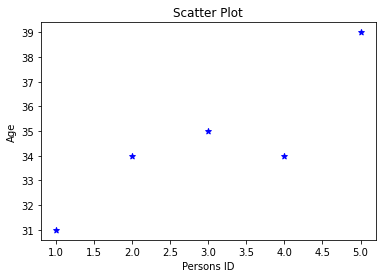

In [3]:
#Visualizing the data.
import matplotlib.pyplot as plt
def pl(p_id, age):
    plt.scatter(p_id, age, color = 'blue', marker = '*')
    plt.xlabel('Persons ID')
    plt.ylabel('Age')
    plt.title('Scatter Plot')
    plt.show()
print('Enter 5 students name:')
who = [input for _ in range(5)]
print('Enter the respective Age:')
age = [int(input()) for i in range(5)]
print('Enter ids:')
p_id = [int(input()) for j in range(5)]
pl(p_id, age)

# Handling Large Data

In [5]:
import sqlite3 
  
# Connection with the DataBase 
# 'library.db' 
connection = sqlite3.connect("library.db") 
cursor = connection.cursor() 
  
# SQL piece of code Executed 
# SQL piece of code Executed 
cursor.executescript(""" 
    CREATE TABLE peoplesSSSSS( 
        firstname, 
        lastname, 
        age 
    ); 
   
    CREATE TABLE booksSSSS( 
        title, 
        author, 
        published 
    ); 
   
    INSERT INTO 
    booksSSSS(title, author, published) 
    VALUES ( 
        'Dan Clarke''s GFG Detective Agency', 
        'Sean Simpsons', 
        1987 
    ); 
    """) 
  
sql = """ 
SELECT COUNT(*) FROM booksSSSS;"""
  
cursor.execute(sql) 
  
# The output in fetched and returned 
# as a List by fetchall() 
result = cursor.fetchall() 
print(result) 
  
sql = """ 
SELECT * FROM booksSSSS;"""
  
cursor.execute(sql) 
  
result = cursor.fetchall() 
print(result) 
  
# Changes saved into database 
connection.commit() 
  
# Connection closed(broken)  
# with DataBase 
connection.close() 

[(1,)]
[("Dan Clarke's GFG Detective Agency", 'Sean Simpsons', 1987)]


In [8]:
#example to demonstrate the use of executemany().
import sqlite3
conn = sqlite3.connect('library.db')
cursor = conn.cursor()
cursor.execute(
"""CREATE TABLE booksSS(
title, 
author, 
published);
""")
li = [['A', 'B', 2013], ['C', 'D', 2014], ['E', 'F', 2015]]
conn.executemany("""
INSERT INTO 
booksSS(title, author, published)
VALUES (?, ?, ?)""", li)
sql = """
        SELECT * FROM booksSS;"""
cursor.execute(sql)
result = cursor.fetchall()
for _ in result:
    print(_)
conn.commit()
conn.close()

('A', 'B', 2013)
('C', 'D', 2014)
('E', 'F', 2015)


In [9]:
#example.
import sqlite3
conn = sqlite3.connect('Company.db')
cursor = conn.cursor()
sql = """CREATE TABLE employeeee(
id INTEGER PRIMARY KEY,
firstname VARCHAR(30),
lastname VARCHAR(20),
gender CHAR(1),
dob DATE)"""
cursor.execute(sql)
sql = """INSERT INTO employeeee VALUES('1', 'Virat', 'Kohli', 'M', '1989-11-5')"""
cursor.execute(sql)
li = [['3', 'Kane', 'Williamson', 'M', '1986-4-4'],
     ['2', 'ABde', 'Villiares', 'M', '1985-17-2'],
     ['4', 'MS', 'Dhoni', 'M', '1981-7-7']]
conn.executemany(
"""INSERT INTO employeeee VALUES (?, ?, ?, ?, ?)""", li)
print('method-1\n')
for _ in conn.execute('SELECT * FROM employeeee ORDER BY ID'):
    print(_)
print('method-2\n')
sql = """SELECT * FROM employeeee ORDER BY ID"""
cursor.execute(sql)
ans = cursor.fetchall()
for i in ans:
    print(i)
conn.commit()
conn.close()

method-1

(1, 'Virat', 'Kohli', 'M', '1989-11-5')
(2, 'ABde', 'Villiares', 'M', '1985-17-2')
(3, 'Kane', 'Williamson', 'M', '1986-4-4')
(4, 'MS', 'Dhoni', 'M', '1981-7-7')
method-2

(1, 'Virat', 'Kohli', 'M', '1989-11-5')
(2, 'ABde', 'Villiares', 'M', '1985-17-2')
(3, 'Kane', 'Williamson', 'M', '1986-4-4')
(4, 'MS', 'Dhoni', 'M', '1981-7-7')


# Inserting Variables to Database table using SQL.

__Steps to Create and Insert variables in database__

In [15]:
#example for creating a database.
import sqlite3
conn = sqlite3.connect('pythonDB.db')
cursor = conn.cursor()
def create_table():
    cursor.execute('CREATE TABLE IF NOT EXISTS RecordONE (Number REAL, Name TEXT)')
def data_entry():
    number = 1234
    name = 'VK'
    cursor.execute('INSERT INTO RecordONE (Number, Name) VALUES(?, ?)',(number, name))
    conn.commit()
create_table()
data_entry()
cursor.close()
conn.close()